In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import pandas as pd

from sklearn import preprocessing

In [35]:
#Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [36]:
#Extract Train and Test Data.
df_tr = pd.read_csv('Data\Intrusion-Detection\Train_data.csv',na_values='?',header=0)
df_tr.head(6)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,20,2,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,45,2,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,icmp,50,4,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,icmp,25,2,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,icmp,25,2,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,icmp,50,1,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,dos


In [37]:
df_ts = pd.read_csv('Data\Intrusion-Detection\Test_data.csv',na_values='?',header=0)
df_ts.head(6)

,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,202,0,icmp,25,4,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.65,0.65,0.32,0.32,dos
1,768,0,icmp,25,2,312,1856,0,0,0,...,254,1.00,0.00,1.00,0.06,0.00,0.00,0.00,0.00,normal
2,3753,0,icmp,25,2,245,2058,0,0,0,...,255,1.00,0.00,0.01,0.05,0.01,0.00,0.00,0.00,normal
3,20087,0,icmp,25,2,298,1267,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,16159,0,icmp,20,2,740,0,0,0,0,...,19,0.18,0.03,0.18,0.00,0.00,0.00,0.00,0.00,normal
5,18012,0,icmp,25,2,304,16414,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [38]:
#Drop Duplicates
df_tr.drop_duplicates(keep='first')
df_ts.drop_duplicates(keep='first')

#Drop NA
df_tr.dropna()
df_ts.dropna()

#Drop ClassLabel column from input array X and Create output array y of Classlabel.
Xtr = np.array(df_tr.drop('xAttack',axis=1))
ytr = np.array(df_tr['xAttack'])
Xts = np.array(df_ts.drop('xAttack',axis=1))
yts = np.array(df_ts['xAttack'])

In [39]:
#Encode
le = preprocessing.LabelEncoder()
lb = preprocessing.LabelBinarizer()

In [40]:
Xtr[:,1] = le.fit_transform(Xtr[:,1])
Xts[:,2] = le.fit_transform(Xts[:,2])
Xts = np.delete(Xts,0,axis=1)

ytr = le.fit_transform(ytr)
lb.fit_transform(ytr)

yts = le.fit_transform(yts)
lb.fit_transform(yts)


array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

#Scale the data
scaler = StandardScaler()
scaler.fit(Xtr)
Xtr_t = scaler.transform(Xtr)
Xts_t = scaler.transform(Xts)

In [42]:
from sklearn.decomposition import PCA
ncomp =41
# Construct the PCA object
pca = PCA(n_components=ncomp, 
          svd_solver='randomized', whiten=True)

# Fit the PCA components
pca.fit(Xtr_t)
Ztr = pca.transform(Xtr_t)
Zts = pca.transform(Xts_t)

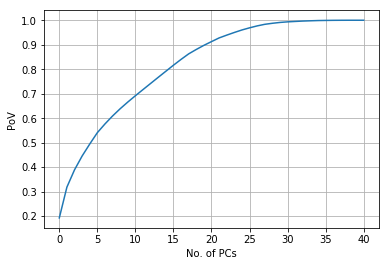

In [43]:
#Plot PoV
S = pca.singular_values_

lam = S**2
PoV = np.cumsum(lam)/np.sum(lam)

plt.plot(PoV)
plt.xlabel('No. of PCs')
plt.ylabel('PoV')
plt.grid()

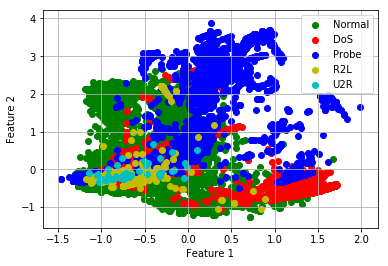

In [44]:
#Plotting the classes, considering two features
cls1 = (ytr==0)
cls2 = (ytr==1)
cls3 = (ytr==2)
cls4 = (ytr==3)
cls5 = (ytr==4)

plt.scatter(Ztr[cls2,0],Ztr[cls2,1],color='g')
plt.scatter(Ztr[cls1,0],Ztr[cls1,1],color='r')
plt.scatter(Ztr[cls3,0],Ztr[cls3,1],color='b')
plt.scatter(Ztr[cls4,0],Ztr[cls4,1],color='y')
plt.scatter(Ztr[cls5,0],Ztr[cls5,1],color='c')
plt.grid()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(['Normal','DoS','Probe','R2L','U2R'])

In [45]:
ncomp =20
# Construct the PCA object
pca = PCA(n_components=ncomp, 
          svd_solver='randomized', whiten=True)

# Fit the PCA components on the entire dataset
pca.fit(Xtr_t)
Ztr = pca.transform(Xtr_t)
Zts = pca.transform(Xts_t)

In [46]:
logreg = LogisticRegression(multi_class='auto', solver='lbfgs')
logreg.fit(Ztr,ytr)
yhat = logreg.predict(Zts)

In [48]:
acc = np.mean(yhat == yts)
print('Accuracy:', acc)

Accuracy: 0.7348


We can use cross validation to find out the optimal number of PCs.

In [49]:
ncomp_test = np.arange(2,41)
acc = []

for icomp, ncomp in enumerate(ncomp_test):
    pca = PCA(n_components=ncomp)
    pca.fit(Xtr_t)
    Ztr = pca.transform(Xtr_t)
    Zts = pca.transform(Xts_t)
    
    logreg = LogisticRegression(multi_class='auto', solver='lbfgs')
    logreg.fit(Ztr,ytr)
    
    yhat = logreg.predict(Zts)
    acci = np.mean(yhat==yts)
    acc.append(acci)

imax = np.argmax(acc)
accuracy = acc[imax]
print(accuracy)

0.7574


In [22]:
optPCA = ncomp_test[imax]
print('Optimal PCs:',optPCA)

Optimal PCs: 32


In [27]:
ncomp =32
pca = PCA(n_components=ncomp, 
          svd_solver='randomized', whiten=True)

pca.fit(Xtr_t)
Ztr = pca.transform(Xtr_t)
Zts = pca.transform(Xts_t)

logreg = LogisticRegression(multi_class='auto', solver='lbfgs')
logreg.fit(Ztr,ytr)
yhat_tr = logreg.predict(Ztr)
acc_tr = np.mean(yhat_tr==ytr)
print('Train Accuracy:',acc_tr)

yhat_ts = logreg.predict(Zts)
acc_ts = np.mean(yhat_ts==yts)
print('Tesy Accuracy:',acc_ts)

0.9615870067395395
0.7546
